In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models
import numpy as np



# -----------------------------
# 1) 데이터 준비
# -----------------------------


In [ ]:
# -----------------------------
# 1) 데이터 준비
# -----------------------------


import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)




In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape  # 각 데이터의 shape 확인 (전체데이터 수, 컬럼숫자)

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [35]:
# -----------------------------
# 2) 모델 구성
# -----------------------------
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),              
    
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),               
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  
    metrics=["accuracy"]
)



In [36]:
# -----------------------------
# 3) 모델 학습
# -----------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7607 - loss: 0.6499 - val_accuracy: 0.8572 - val_loss: 0.4126
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8437 - loss: 0.4367 - val_accuracy: 0.8767 - val_loss: 0.3320
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8615 - loss: 0.3851 - val_accuracy: 0.8866 - val_loss: 0.3087
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8732 - loss: 0.3560 - val_accuracy: 0.8937 - val_loss: 0.2846
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8791 - loss: 0.3342 - val_accuracy: 0.8947 - val_loss: 0.2852
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8828 - loss: 0.3199 - val_accuracy: 0.9004 - val_loss: 0.2666
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8878 - loss: 0.3081 - val_accuracy: 0.9018 - val_loss: 0.2606
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8914 - loss: 0.2972 

In [37]:
# -----------------------------
# 4) 예측결과 생성
# -----------------------------

y_pred = model.predict(X_test)

y_pred_class = np.argmax(y_pred, axis=1)     # (N,)
y_test_class = y_test  # (N,)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [38]:
# 학습 곡선

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

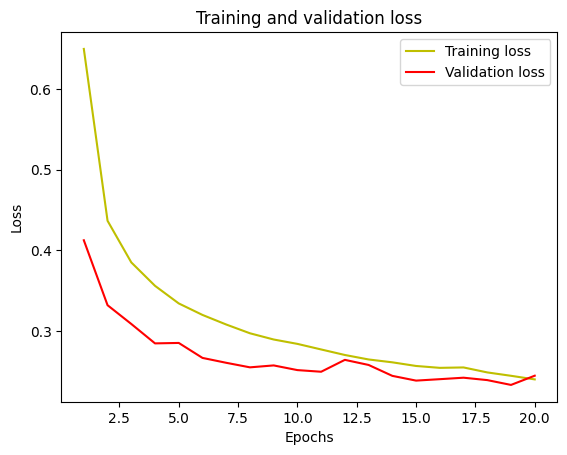

In [39]:

import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

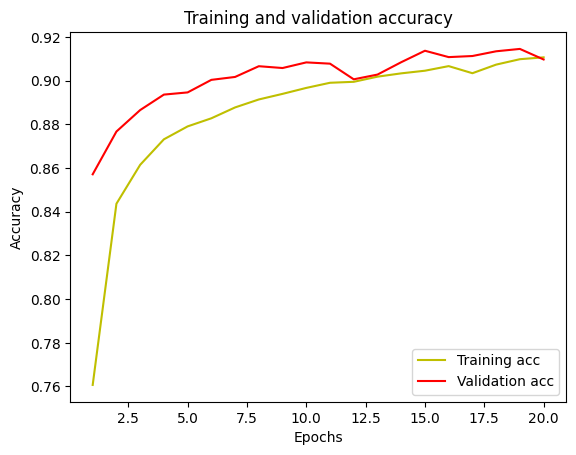

In [40]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [23]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.97      1.00      0.98        28
           2       1.00      0.97      0.98        33
           3       0.97      1.00      0.98        29
           4       1.00      1.00      1.00        46
           5       1.00      0.97      0.98        33
           6       0.97      1.00      0.99        37
           7       1.00      1.00      1.00        31
           8       0.97      0.97      0.97        39
           9       1.00      0.97      0.99        35

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

[[49  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 32  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 32  1  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0